In [1]:
import os
with open(os.path.join('data', 'ALG_abstract.txt'), 'r') as f:
    data = f.read()

In [2]:
data[:100]

'Many natural language questions (e.g., “What is a hard disk?”) are submitted to search engines on th'

## Graph representation

In [3]:
from graph import build_graph, plot_graph

In [4]:
G = build_graph(data, directed=True, weighted=False)

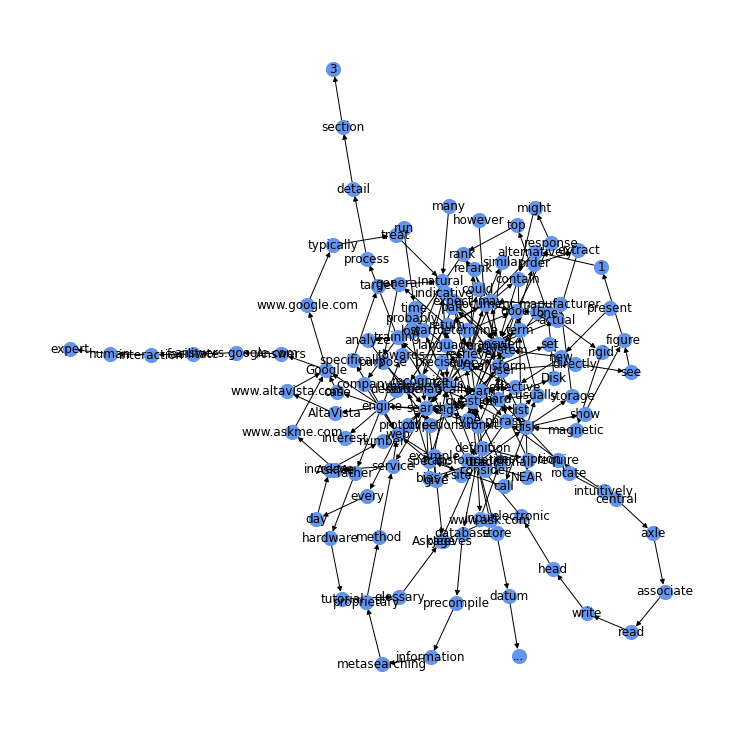

In [5]:
plot_graph(G)

## Keyphrase extracting

ref: https://towardsdatascience.com/keyphrase-extraction-with-graph-centrality-989e142ce427

Key idea: Use the **Centrality Algorithm** provided in NetworkX

 + [Available algorithms](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)

### keywords

In [6]:
import networkx as nx

In [7]:
def get_keywords(scores:dict, n:int = None):
    sorted_scores = sorted(scores.items(), key=lambda item: -item[1])
    if not n:
        n = int(len(node_scores) / 3)
    return [token for token, _ in sorted_scores[:n]]

In [8]:
node_scores = nx.betweenness_centrality(G)

In [9]:
keywords = get_keywords(node_scores, int(len(node_scores)/3))
print(keywords)

['question', 'search', 'answer', 'engine', 'Tritus', 'use', 'disk', 'query', 'hard', 'document', 'web', 'e.g.', 'retrieve', 'Google', 'language', 'natural', 'service', 'treat', 'typically', 'www.google.com', 'transform', 'return', 'good', 'electronic', 'head', 'write', 'read', 'associate', 'axle', 'central', 'rotate', 'may', 'system', 'submit', 'training', 'definition', 'page', 'glossary', 'tutorial', 'hardware', 'rather', 'Answers', 'alternatively', '1', 'figure', 'method', 'proprietary', 'metasearching', 'information']


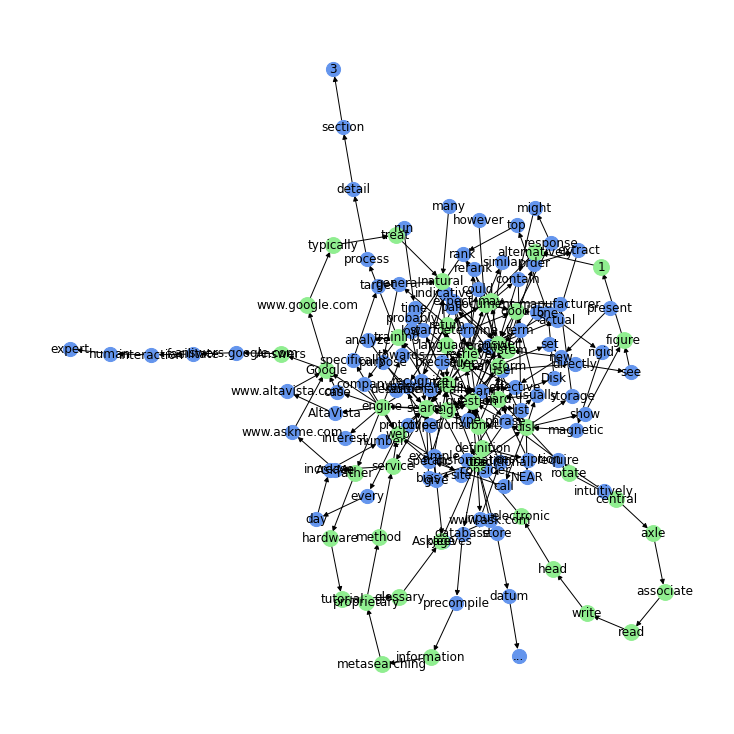

In [10]:
plot_graph(G, highlight=keywords)

### keyword to keyphrase

In [11]:
from graph import preprocess_document

In [12]:
def get_keyphrase(document:list, keywords:list):
    keyphrases = [[]]
    pre_keyword = False
    for sent in document:
        for token in sent:
            if token in keywords:
                keyphrases[-1].append(token)
                pre_keyword = True
            elif pre_keyword:
                keyphrases[-1] = ' '.join(keyphrases[-1])
                keyphrases.append([])
                pre_keyword = False
    
    keyphrases = list(set(keyphrases[:-1]))
    return keyphrases

In [13]:
doc = preprocess_document(data, stopwords=[], punc='')

In [14]:
phrases = get_keyphrase(doc, keywords)

In [15]:
phrases

['information',
 'alternatively',
 'use',
 'question answer system',
 'retrieve answer',
 'answer',
 'rather hardware tutorial',
 'submit',
 'search service',
 'return',
 'central axle',
 'service',
 'good',
 'retrieve document',
 'disk rotate',
 'www.google.com',
 'Google',
 'good transform',
 'Tritus training',
 'natural language question',
 'Tritus return',
 'e.g.',
 'write head',
 'document return',
 'associate read',
 'question use',
 'disk',
 'Tritus',
 'hard',
 'Google Answers',
 'query',
 'search engine',
 'training',
 'web',
 'document',
 'web search engine',
 'typically treat natural language question',
 'figure 1',
 'transform natural language question',
 'glossary page',
 'hard disk',
 'good document',
 'Tritus search',
 'electronic',
 'good answer may',
 'metasearching',
 'proprietary method',
 'may',
 'question',
 'definition',
 'transform',
 'natural language question submit',
 'retrieve',
 'system']